HEART DISEASE CLASSIFICATION USING MACHINE LEARNING AND DEEP LEARNING

In [218]:
#Loading dataset
import warnings
import csv
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #to visualise missing value
%matplotlib inline
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization


#Data pre-processing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold


#Data splitting
from sklearn.model_selection import train_test_split

#Data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier

from yellowbrick.style import set_palette
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

#Ensembling
from mlxtend.classifier import StackingCVClassifier
#save our best model
import pickle as pkl

LOAD DATASET

In [219]:
#loading dataset
df = pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [220]:
#Check the shape of dataset
df.shape

(1025, 14)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [223]:
print('Datatype : ',(df))

Datatype :        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  

In [224]:
#Checking of the columns of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [225]:
#variable types
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

INFO OF THE DATASET

In [226]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [227]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [228]:
# Checking for imbalanced data based on sex.
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [229]:
# Checking for imbalanced data based on outcome.
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [230]:
#Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [231]:
#replace the NaN with median
df=df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [232]:
duplicated=df.duplicated().sum()
if duplicated:
    print('Duplicates rows in dataset are:{}'.format(duplicated))
else:
    print('No duplicate')

Duplicates rows in dataset are:723


In [233]:
duplicated=df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [234]:
#To know the basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

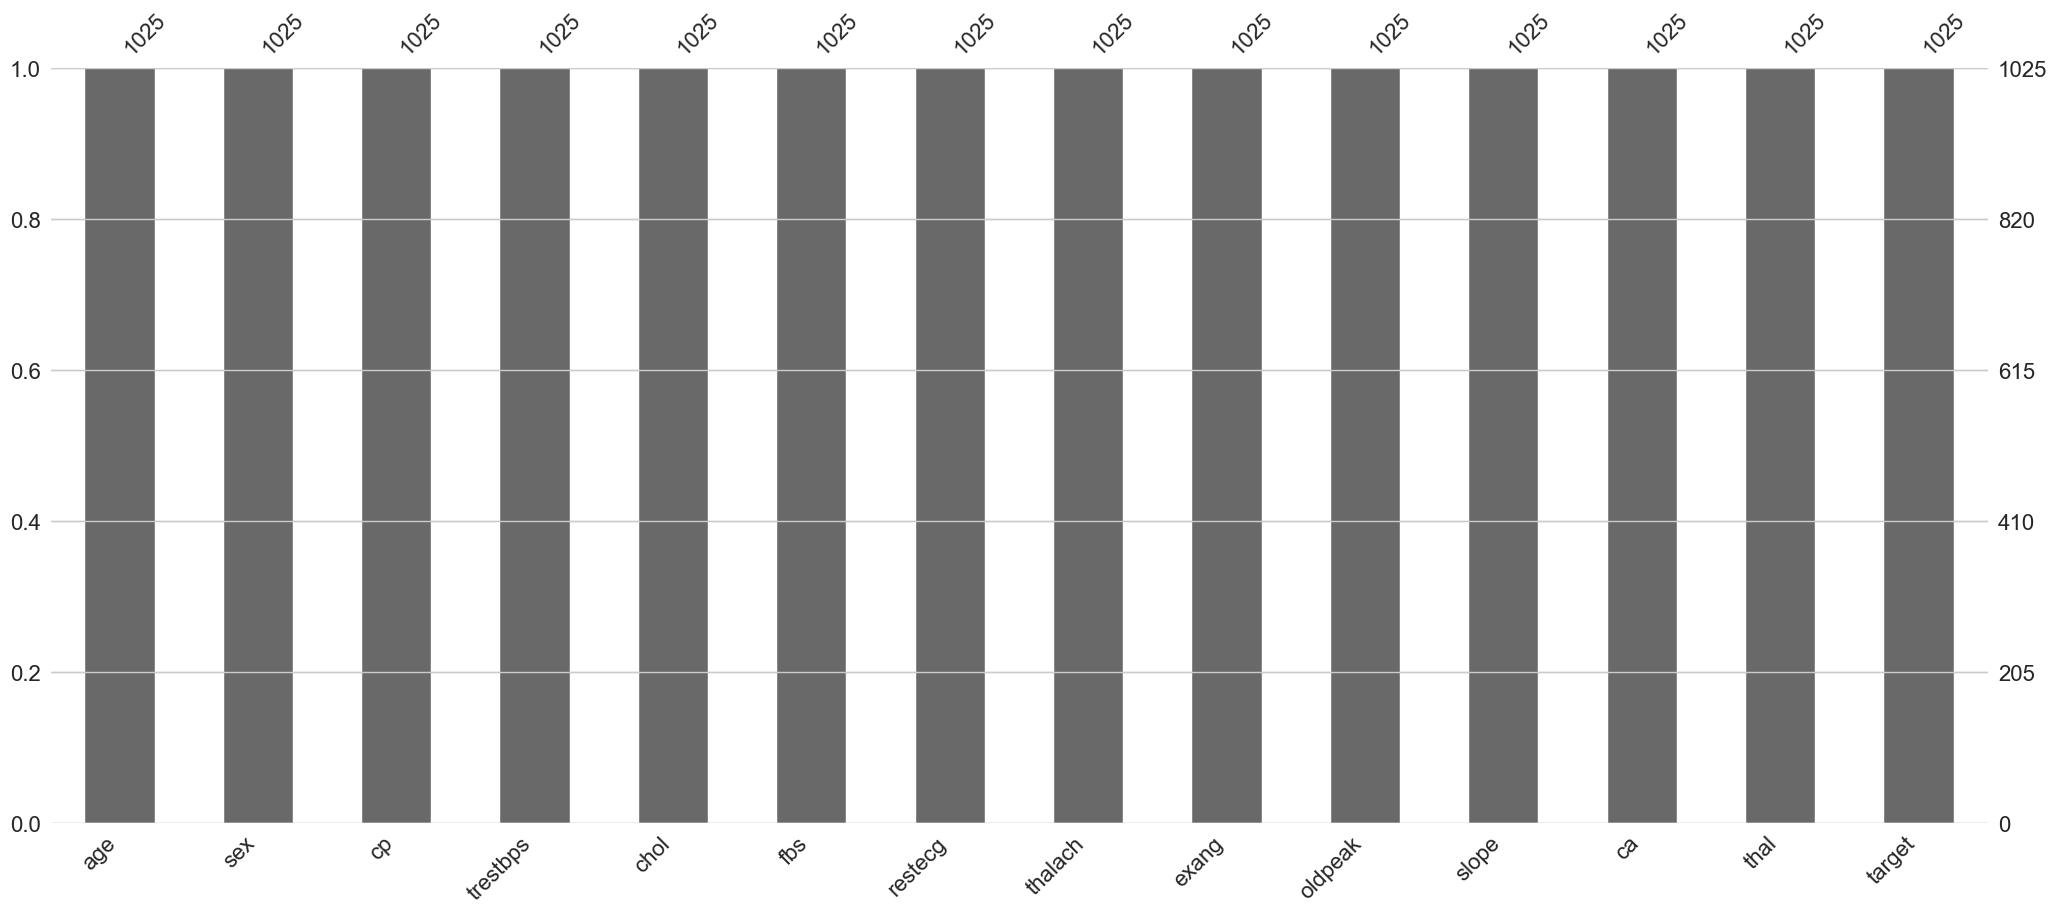

In [235]:
msno.bar(df)

In [236]:
df_corr = df.corr()
print('\n The data correlation\n', df_corr)


 The data correlation
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  

<AxesSubplot:>

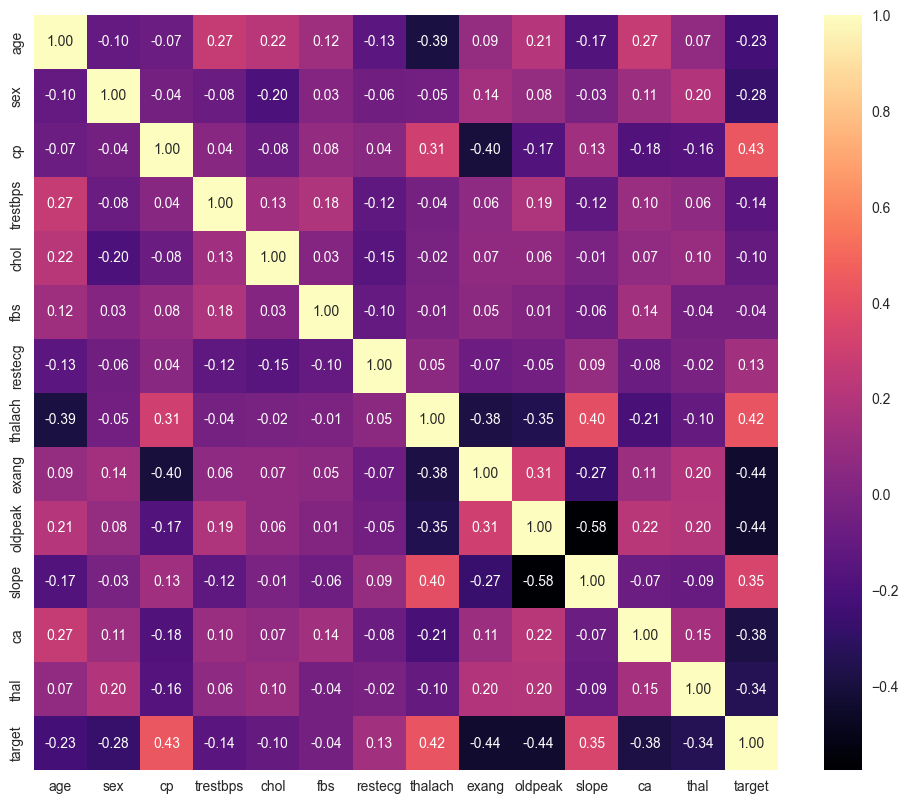

In [237]:
# plot a heatmap using the correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt='.2f')

In [238]:
#changing labeling for better visualisation and interpretation.
df['target']=df.target.replace({1:'Disease', 0:'No disease'})
df['sex']=df.sex.replace({1:'Male', 0:'Female'})
df['cp']=df.cp.replace({0:'typical_angina',1:'atypical_angina',2:'non-angina pain',3:'asymtomatic'})
df['exang']=df.exang.replace({1:'Yes',0:'No'})
df['fbs']=df.fbs.replace({1:'True',0:'False'})
df['slope']=df.slope.replace({0:'upsloping',1:'flat',2:'downsloping'})
df['thal']=df.thal.replace({1:'Fixed_defect',2:'Reversable_defect',3:'Normal'})

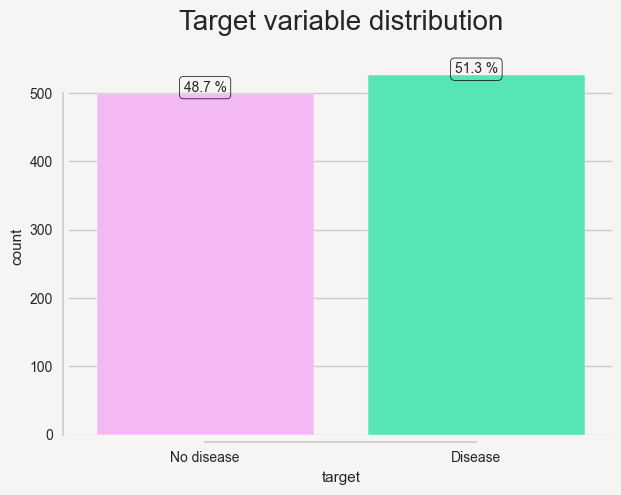

In [239]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

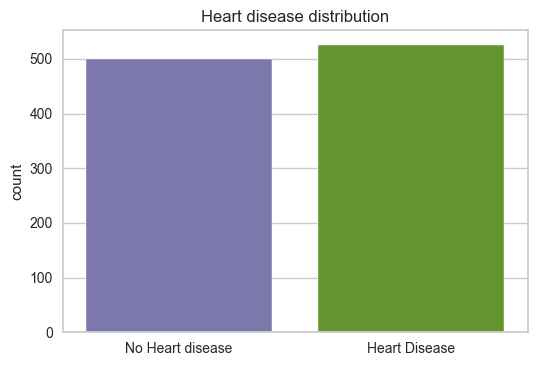

In [240]:
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

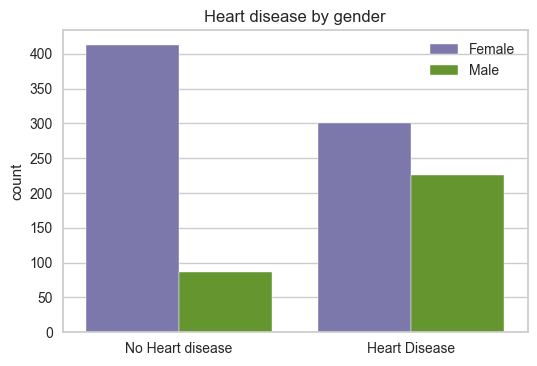

In [241]:
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

Sex Ratio in Data
Male      713
Female    312
Name: sex, dtype: int64


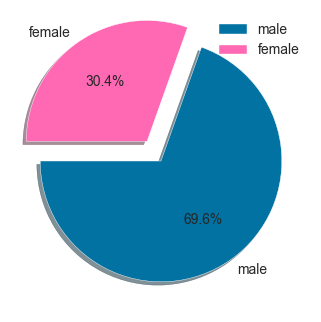

In [242]:
print("Sex Ratio in Data")
print(df["sex"].value_counts())

plt.pie(df["sex"].value_counts(),
        labels = ["male", "female"],
        colors = ["b","hotpink"],
        autopct='%1.1f%%',
        explode = [0,0.2],
        startangle = 180,
        shadow = True)

plt.legend()
plt.show()

CHECKING FOR SKEWNESS AND KURTOSIS

In [243]:
print(f'\nSkewed values:\n', df.skew())


Skewed values:
 age        -0.248866
trestbps    0.739768
chol        1.074073
restecg     0.180440
thalach    -0.513777
oldpeak     1.210899
ca          1.261189
dtype: float64


In [244]:
print('\nkurtosis values:\n',df.kurt())


kurtosis values:
 age        -0.525618
trestbps    0.991221
chol        3.996803
restecg    -1.309614
thalach    -0.088822
oldpeak     1.314471
ca          0.701123
dtype: float64


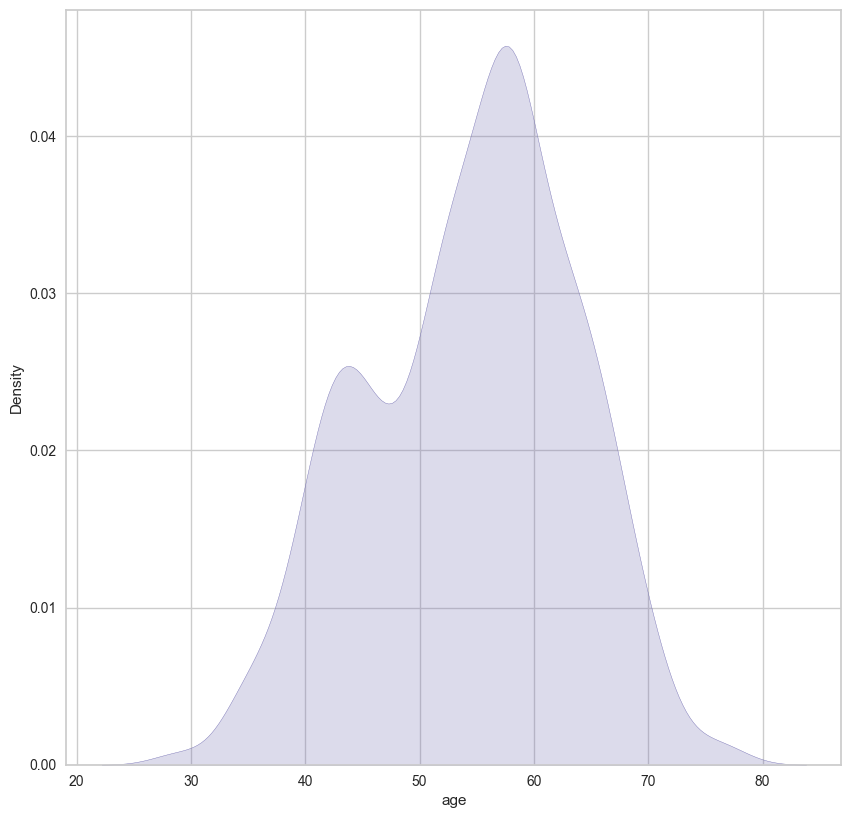

In [245]:
## KDE plot according to AGE
fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.kdeplot(df['age'],shade=True,ax=ax)
plt.show()

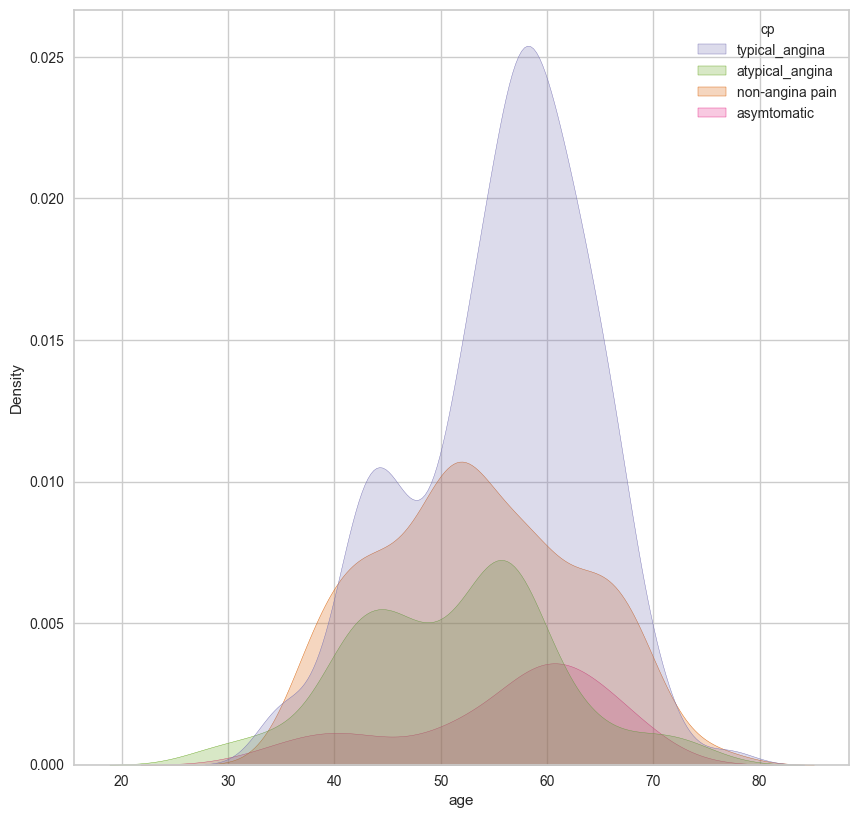

In [246]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.kdeplot(data=df,x='age',hue='cp',shade=True)
plt.show()

In [247]:
print(f'\nSkewed values:\n', df.skew())


Skewed values:
 age        -0.248866
trestbps    0.739768
chol        1.074073
restecg     0.180440
thalach    -0.513777
oldpeak     1.210899
ca          1.261189
dtype: float64


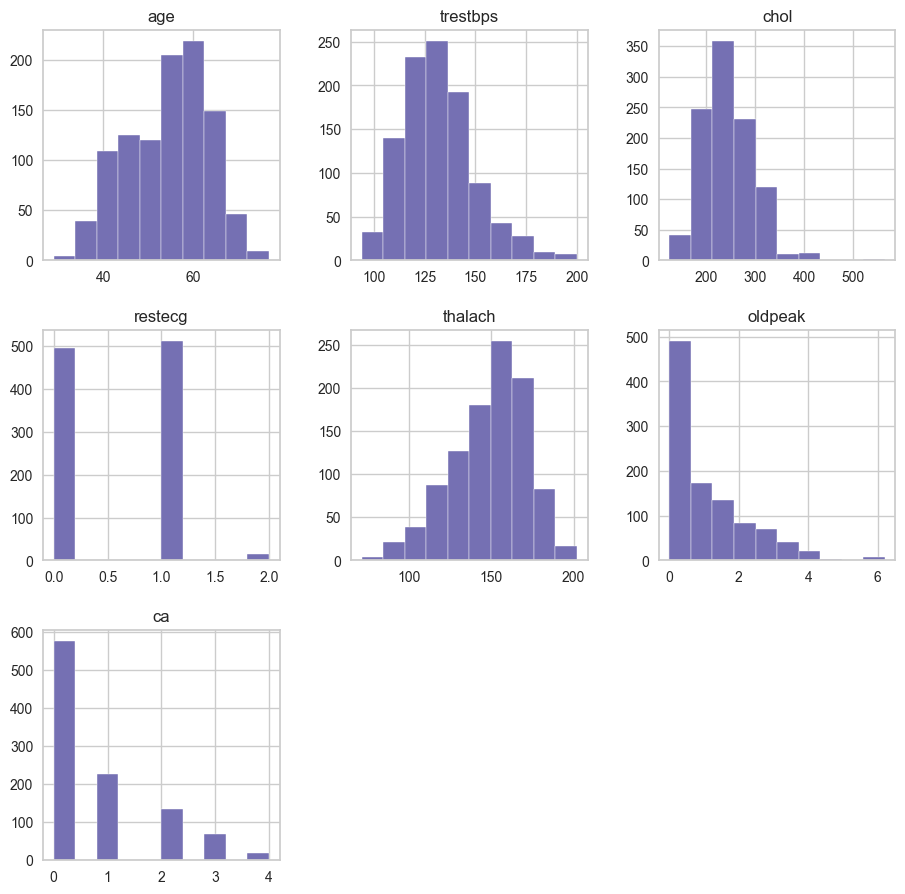

In [248]:
df.hist(figsize=(11,11))
plt.show()

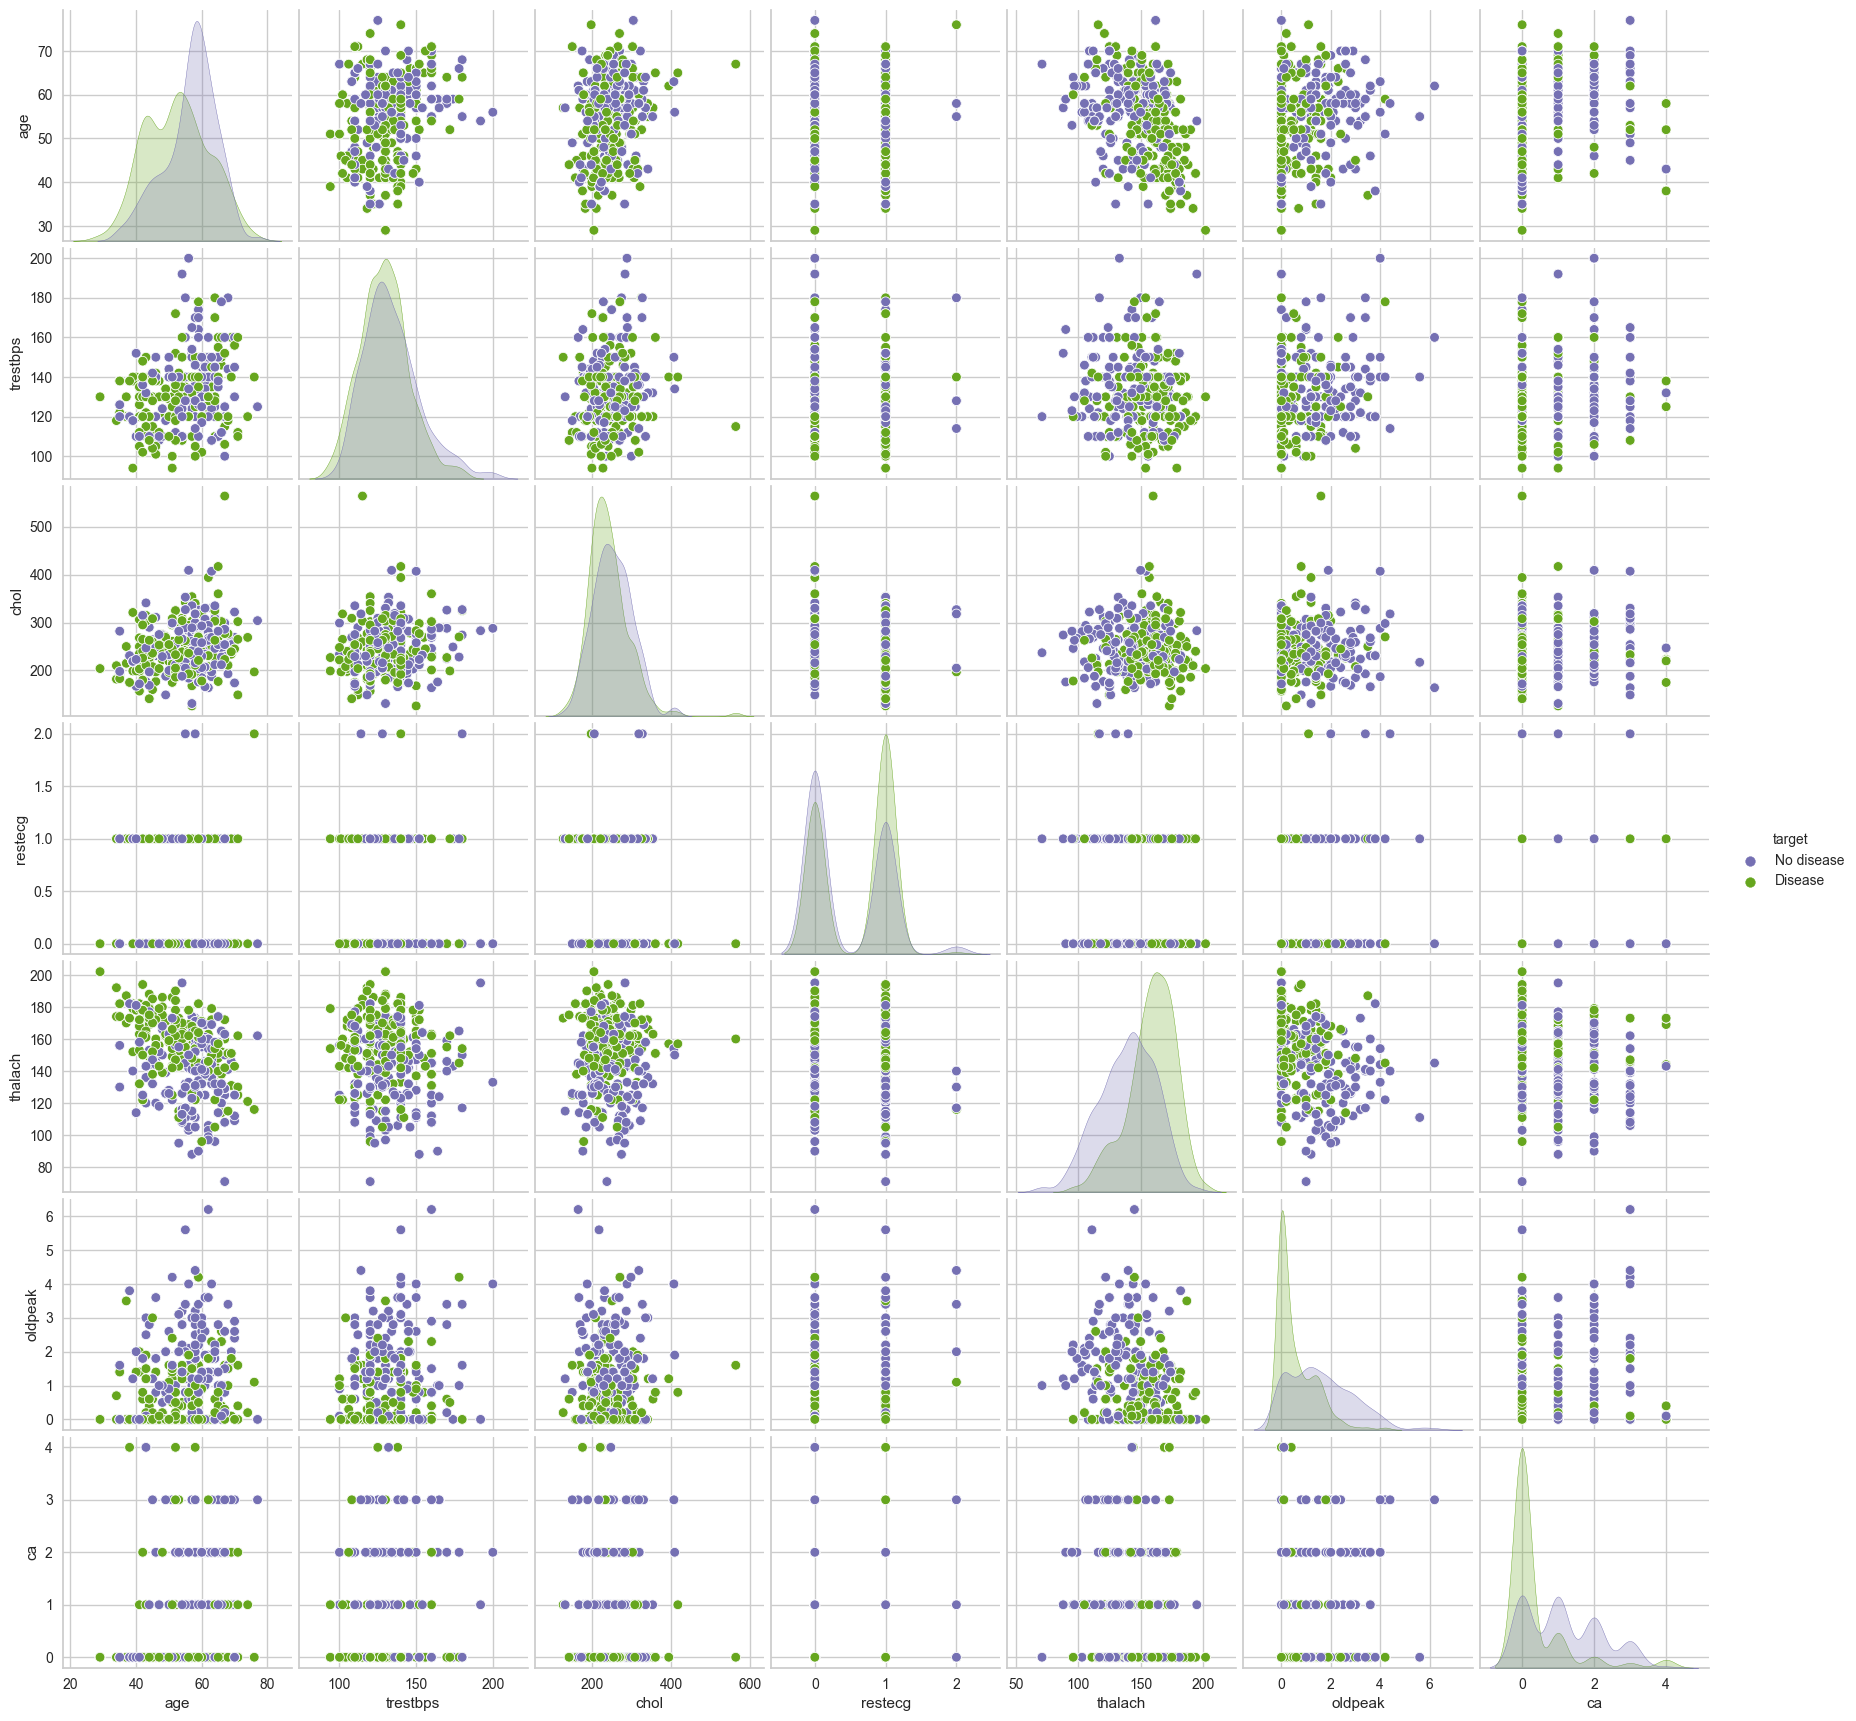

In [249]:
sns.pairplot(df,hue='target')

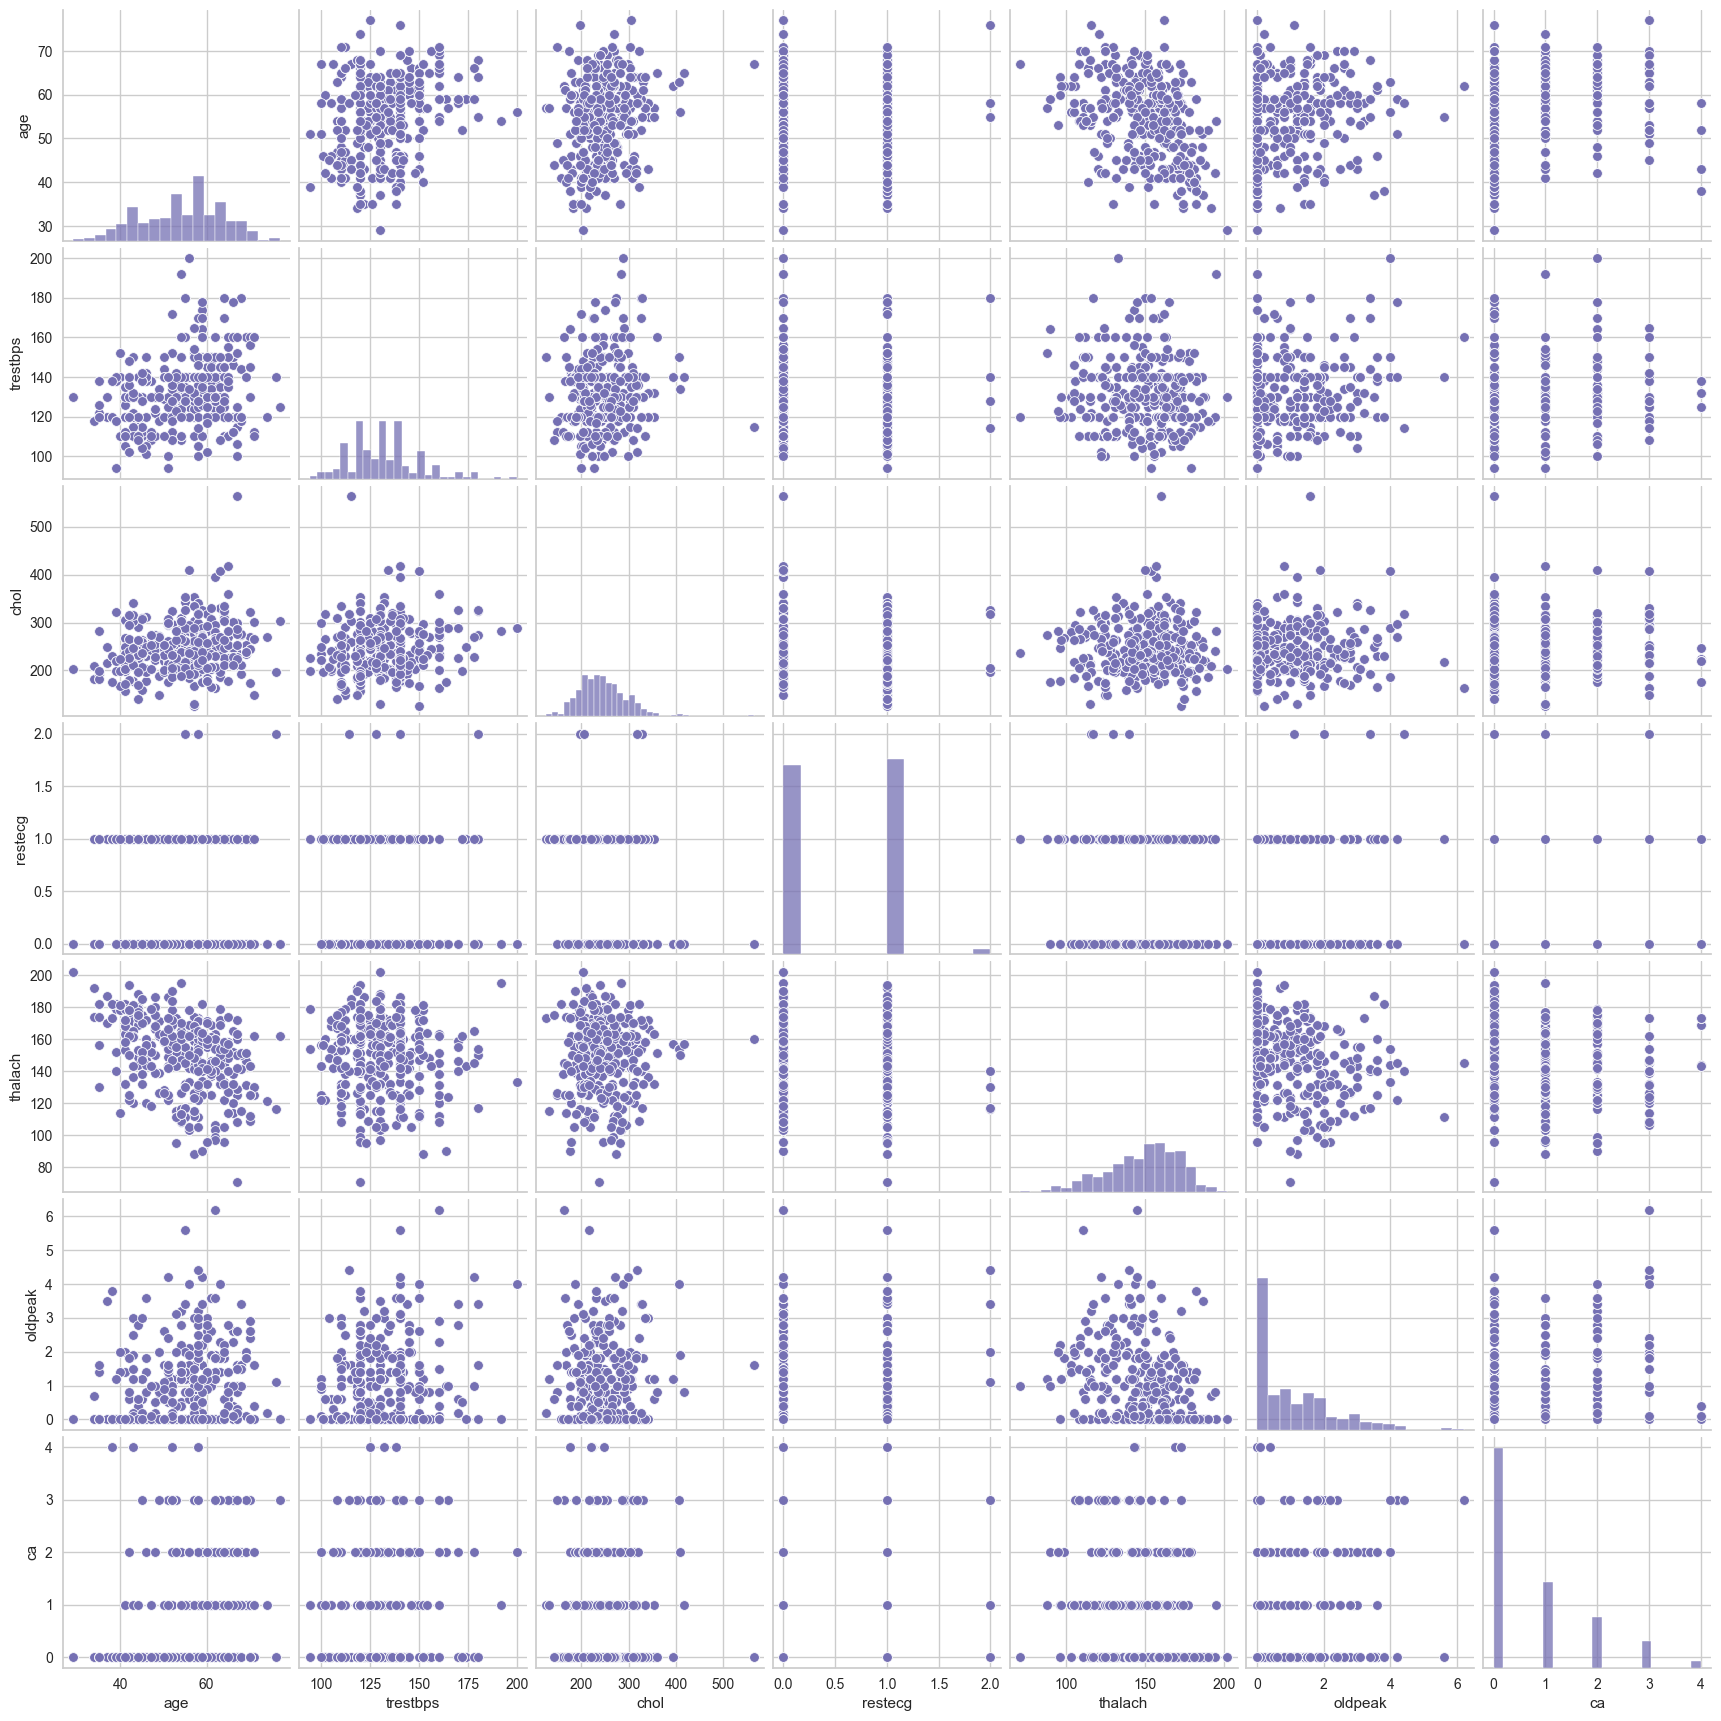

In [250]:
sns.pairplot(df)

In [251]:
# Box plot to show outliers for continuos data
# Set up the subplots grid
fig = make_subplots(rows=2, cols=3,
                    # Set the subplot titles
                    subplot_titles=['Age', 'Trestbps', 'Cholesterol','Thalach','Oldpeak'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=df.age, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=df.trestbps, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=df.chol, name='', showlegend=False), row=1, col=3)
fig.add_trace(go.Box(x=df.thalach, name='', showlegend=False), row=2, col=1)
fig.add_trace(go.Box(x=df.oldpeak, name='', showlegend=False), row=2, col=2)

fig.update_layout(height=500, width=900)
fig.show()

In [252]:
fig = px.box(df, x='target', y='chol')
fig.show()

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

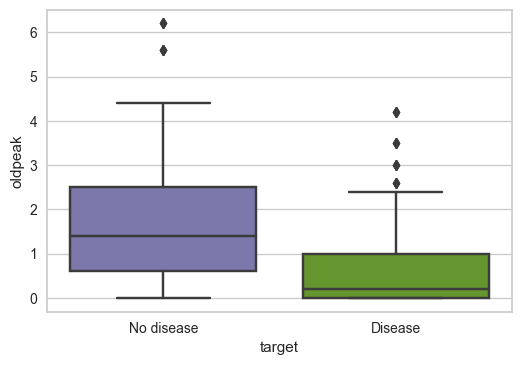

In [253]:
#using seaborn
sns.boxplot( x='target', y='oldpeak',data=df)

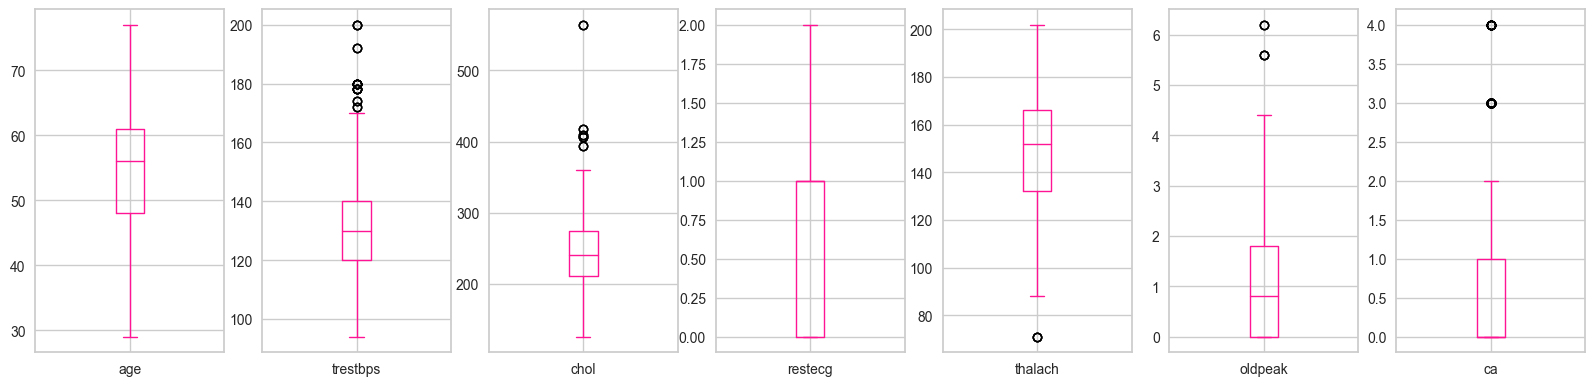

In [254]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='deeppink');

CHECKING AND REMOVING OUTLIERS

In [255]:
#define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 30
For the feature chol, No of Outliers is 16
For the feature thalach, No of Outliers is 4
For the feature oldpeak, No of Outliers is 7


In [256]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Disease       508
No disease    460
Name: target, dtype: int64


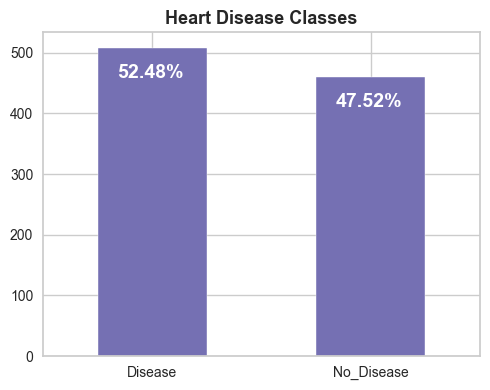

In [257]:
#Target variable distribution
print(df.target.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()


Text(0.5, 1.0, 'Age Distribution')

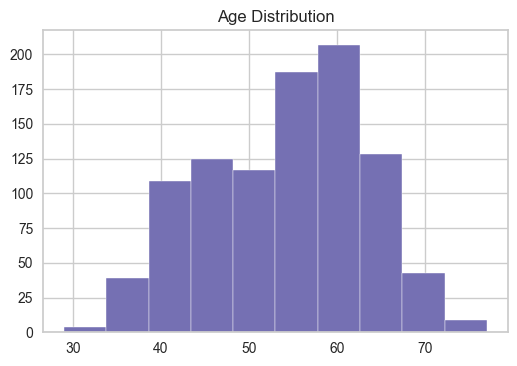

In [258]:
# print(df.age.value_counts())
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

58    68
57    57
54    50
52    40
59    40
51    39
60    37
44    36
41    32
56    32
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

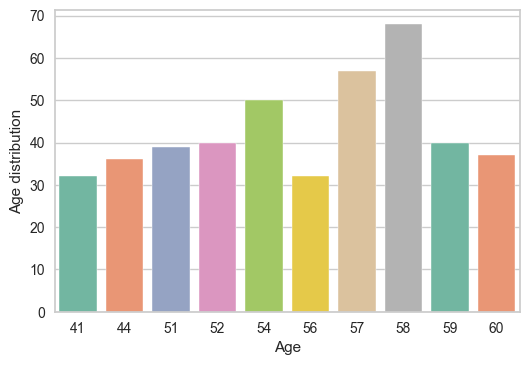

In [259]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [260]:
#To know the youngest or oldest in age
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
54.07334710743802


In [261]:
# to find out columns with non numeric data so we will know which ones to use encoding for
non_numerical_data=[f for f in df.columns if df[f].dtype=='O']
non_numerical_data

['sex', 'cp', 'fbs', 'exang', 'slope', 'thal', 'target']

In [262]:
# to find out columns with numeric data
numerical_data=[f for f in df.columns if df[f].dtype!='O']
numerical_data

['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca']

In [263]:
# to find out columns with continuos data for EDA and predictions
numerical_data_contineous=[f for f in numerical_data if df[f].nunique()>10]
numerical_data_contineous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [264]:
# to find out columns with discrete variables
numerical_data_discrete=[f for f in numerical_data if df[f].nunique()<14]
numerical_data_discrete

['restecg', 'ca']

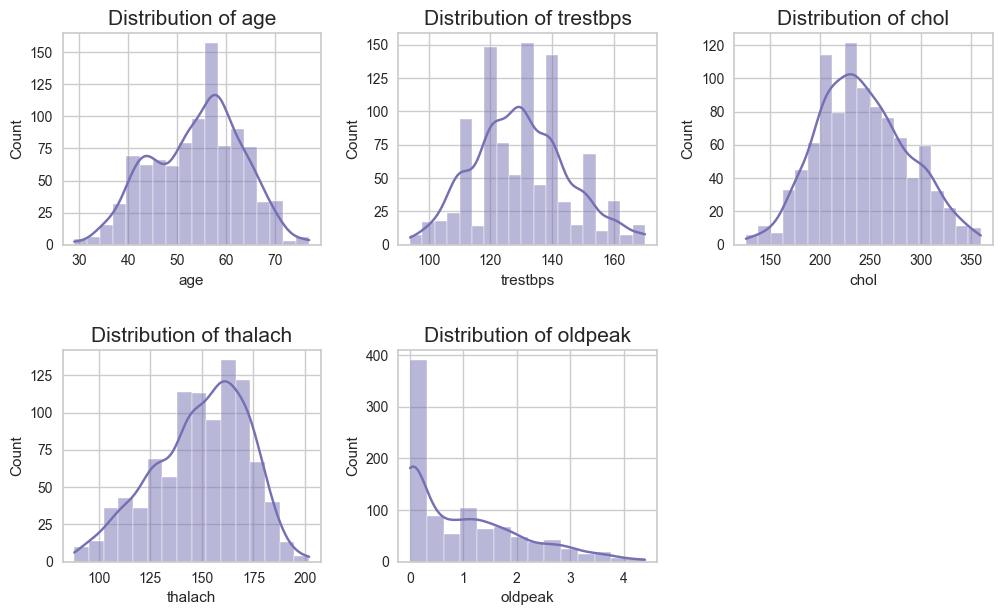

In [265]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))
axes = axes.flatten()

for col, ax in zip(numerical_data_contineous, axes):
    ax = sns.histplot(data = df, x = col, ax = ax, kde = True)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

axes[-1].axis('off')
plt.show()

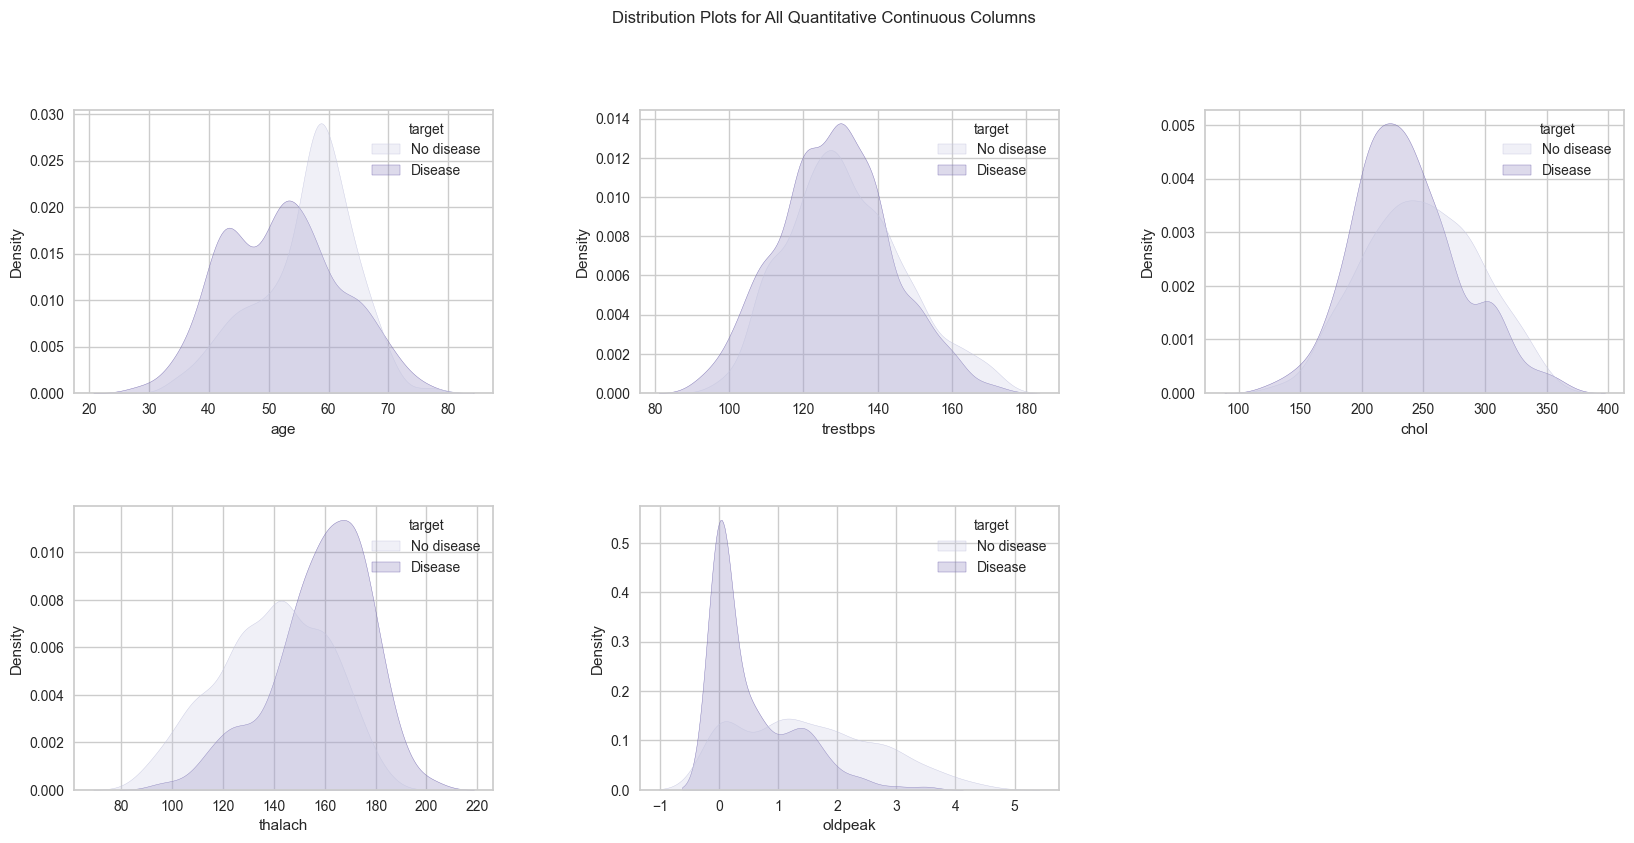

In [266]:
columns = ['Age', 'Trestbps', 'Chol', 'Thalach', 'Old_Peak']

plt.figure(figsize=(20,10))

for n, column in enumerate(numerical_data_contineous):
    ax = plt.subplot(2, 3, n + 1)
    sns.kdeplot(data = df, x = column, palette="Purples", shade=True, hue='target')
    plt.grid('on')

plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.suptitle("Distribution Plots for All Quantitative Continuous Columns")
plt.show()

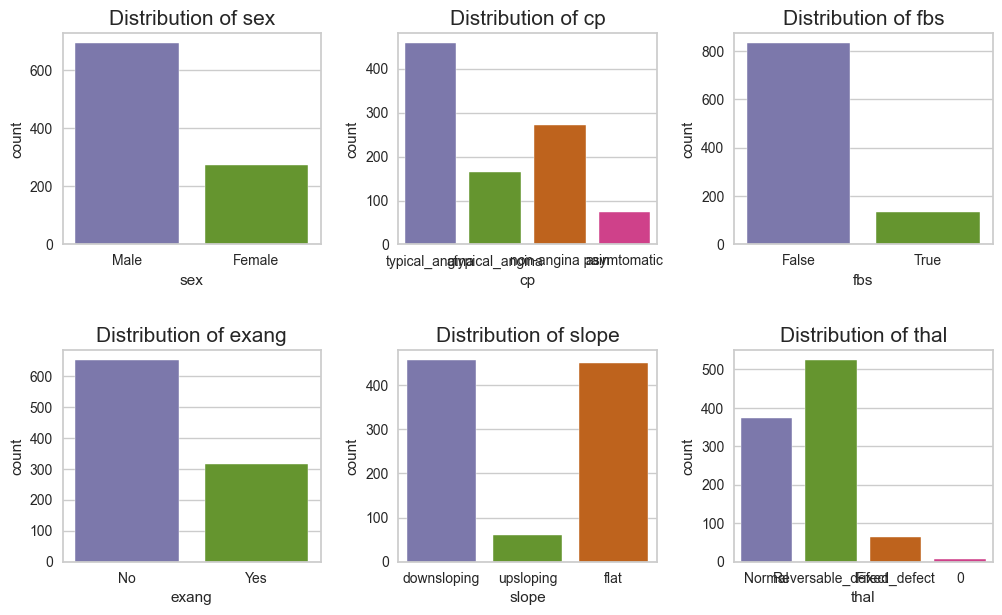

In [267]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))
axes = axes.flatten()

for col, ax in zip(non_numerical_data, axes):
    ax = sns.countplot(data = df, x = col, ax = ax)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

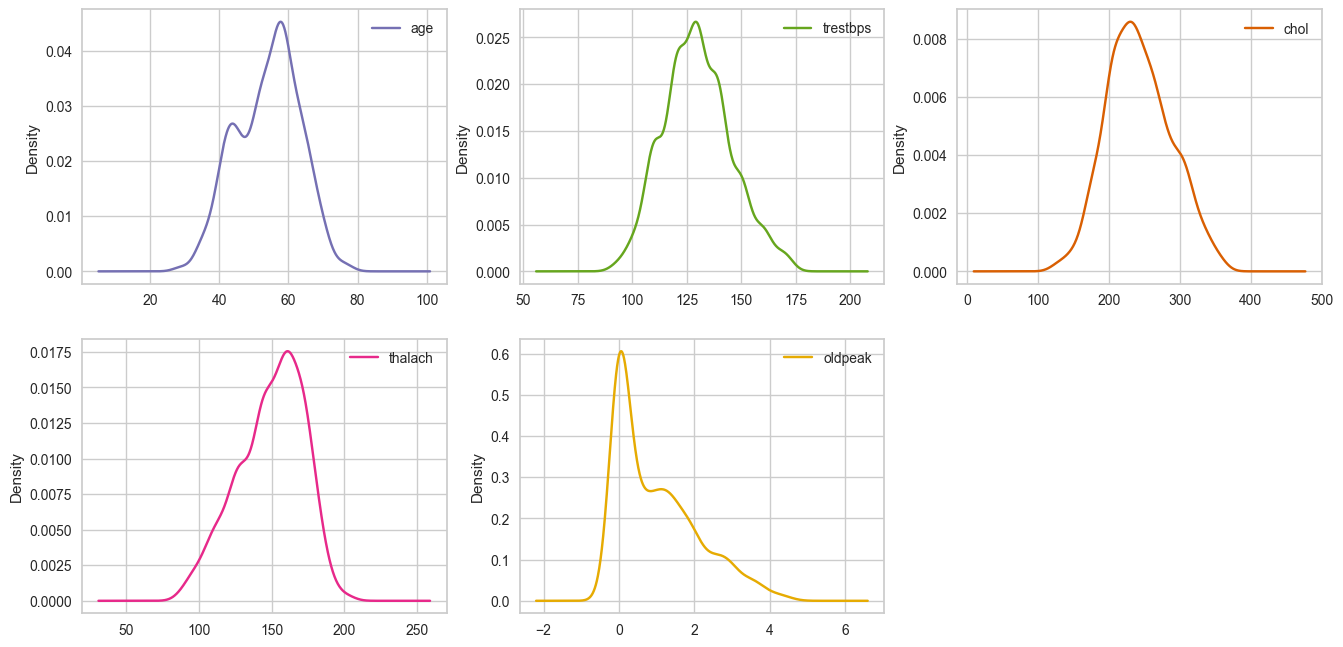

In [268]:
df[numerical_data_contineous].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

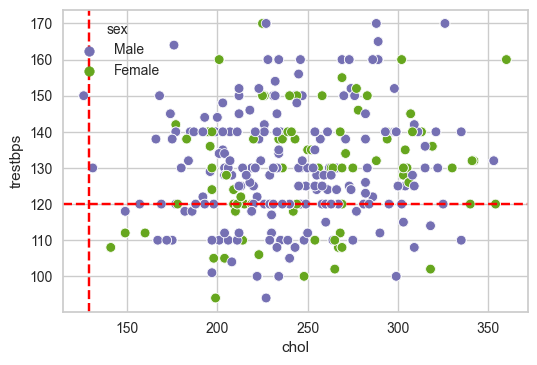

In [269]:
# scatter plot
sns.scatterplot(x='chol',y='trestbps',hue='sex',data=df)
plt.axvline(129, linestyle = '--', color = "red") #normal level for LDL
plt.axhline(120, linestyle = '--', color = "red") #normal resting BP
plt.show()

DATA PRE-PROCESSING BEFORE BUILDING MACHINE LEARNING MODELS

ONE HOT ENCODING (TRANSFORMING CATEGORICAL DATA USING ONE-HOT ENCODING)

In [270]:
#encoding with one-hot encoding.
df['target']=df.target.replace({'Disease':1, 'No disease':0})
df['sex']=df.sex.replace({'Male':1, 'Female':0})
df['cp']=df.cp.replace({'typical_angina':0,'atypical_angina':1 ,'non-angina pain':2,'asymtomatic':3})
df['exang']=df.exang.replace({'Yes':1,'No':0})
df['fbs']=df.fbs.replace({'True':1,'False':0})
df['slope']=df.slope.replace({'upsloping':0,'flat':1,'downsloping':2})
df['thal']=df.thal.replace({'Fixed_defect':1,'Reversable_defect':2,'Normal':3})

In [271]:
# --- Creating Dummy Variables for categorical
categ_val=[]
cont_val=[]

for column in df.columns:
    if df[column] .nunique() <=10:
        categ_val.append(column)
    else:
        cont_val.append(column)


In [272]:
categ_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [273]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [274]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [275]:
#Creating dummies for categorical values
df=pd.get_dummies(df, drop_first=True)

In [276]:
df.shape

(968, 14)

In [277]:
#Display new data frame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


NORMALIZATION

In [278]:
# --- Splitting Dataset into 70:30 ---
X = df.drop(['target'], axis=1)
y = df['target']
X=X.astype(float)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0


In [279]:
#SCALING OF DATA
scaler=MinMaxScaler()
scaler= scaler.fit_transform(X)

TRAIN THE DATA

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [281]:
print(X.shape, X_train.shape, X_test.shape)

(968, 13) (677, 13) (291, 13)


CHECKING SAMPLE SIZE

In [282]:
print('X_train-', X_train.size)
print('X_test-', X_test.size)
print('y_train-', y_train.size)
print('y_train-', y_train.size)

X_train- 8801
X_test- 3783
y_train- 677
y_train- 677


In [283]:
y_train

742    0
367    0
427    1
859    0
376    1
      ..
950    0
756    0
468    1
186    0
129    1
Name: target, Length: 677, dtype: int64

IMPLEMENTATION OF MODELS

KNN

K-Neighbors Classifier : 74.22680412371135%
confusion matrix
nb_conf_matrix


Accuracy of KNN model: 0.7422680412371134 

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       144
           1       0.75      0.74      0.74       147

    accuracy                           0.74       291
   macro avg       0.74      0.74      0.74       291
weighted avg       0.74      0.74      0.74       291



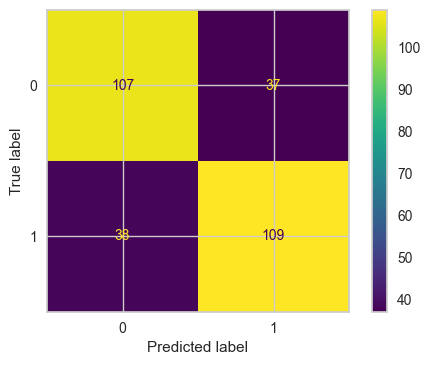

In [284]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix=confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print(f"K-Neighbors Classifier : {knn_acc_score*100}%")
print('confusion matrix')
print('nb_conf_matrix')
print('\n')
print('Accuracy of KNN model:',knn_acc_score,'\n')
print(classification_report(y_test,knn_predicted))
plot_confusion_matrix(knn, X_test, y_test)

plt.show()

In [285]:
accuracy_score(y_test,knn_predicted)
print(classification_report(y_test, knn_predicted))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       144
           1       0.75      0.74      0.74       147

    accuracy                           0.74       291
   macro avg       0.74      0.74      0.74       291
weighted avg       0.74      0.74      0.74       291



Naive Bayes

confusion matrix
nb_conf_matrix


Accuracy of Naive Bayes model: 0.8350515463917526 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       144
           1       0.80      0.90      0.85       147

    accuracy                           0.84       291
   macro avg       0.84      0.83      0.83       291
weighted avg       0.84      0.84      0.83       291



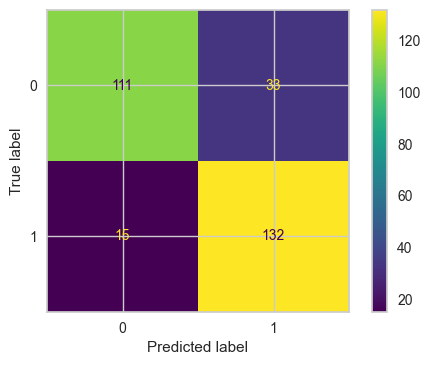

In [286]:
m1='Naive Bayes'
nb=GaussianNB()
nb.fit(X_train,y_train)
nbpred=nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score= accuracy_score(y_test, nbpred)
print('confusion matrix')
print('nb_conf_matrix')
print('\n')
print('Accuracy of Naive Bayes model:',nb_acc_score,'\n')
print(classification_report(y_test,nbpred))
plot_confusion_matrix(nb, X_test, y_test)

plt.show()

In [287]:
accuracy_score(y_test,nbpred)
print(classification_report(y_test, nbpred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       144
           1       0.80      0.90      0.85       147

    accuracy                           0.84       291
   macro avg       0.84      0.83      0.83       291
weighted avg       0.84      0.84      0.83       291



DECISION TREES

confusion matrix
dt_conf_matrix


Accuracy of Decision tree model: 0.9381443298969072 

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       144
           1       0.93      0.95      0.94       147

    accuracy                           0.94       291
   macro avg       0.94      0.94      0.94       291
weighted avg       0.94      0.94      0.94       291



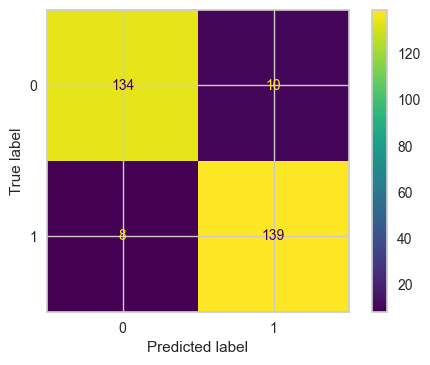

In [288]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)
dtpred=dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dtpred)
dt_acc_score= accuracy_score(y_test, dtpred)
print('confusion matrix')
print('dt_conf_matrix')
print('\n')
print('Accuracy of Decision tree model:',dt_acc_score,'\n')
print(classification_report(y_test,dtpred))

plot_confusion_matrix(dt, X_test, y_test)

plt.show()

In [289]:
acc_test_dt = round(dt.score(X_test, y_test) * 100, 2)
acc_test_dt

93.81

PERCEPTRON

confusion matrix
[[ 77  67]
 [ 23 124]]


Accuracy of Perceptron 0.6907216494845361 

              precision    recall  f1-score   support

           0       0.77      0.53      0.63       144
           1       0.65      0.84      0.73       147

    accuracy                           0.69       291
   macro avg       0.71      0.69      0.68       291
weighted avg       0.71      0.69      0.68       291



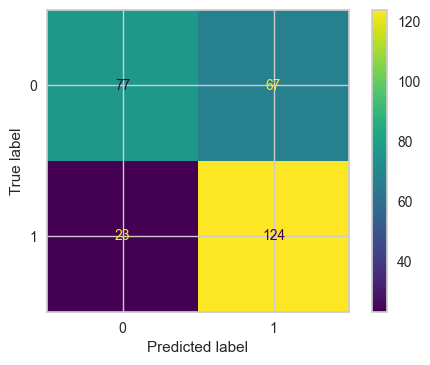

In [290]:

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_predict=perceptron.predict(X_test)
perceptron_conf_matrix=confusion_matrix(y_test, perceptron_predict)
perceptron_acc_score=accuracy_score(y_test, perceptron_predict)
print('confusion matrix')
print(perceptron_conf_matrix)
print('\n')
print('Accuracy of Perceptron',perceptron_acc_score,'\n')
print(classification_report(y_test,perceptron_predict))
plot_confusion_matrix(perceptron, X_test, y_test)

plt.show()

In [291]:
acc_test_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_test_perceptron

69.07

LOGISTIC REGRESSION

confusion matrix
[[115  29]
 [  9 138]]


Accuracy of Logistic Regression 0.8694158075601375 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       144
           1       0.83      0.94      0.88       147

    accuracy                           0.87       291
   macro avg       0.88      0.87      0.87       291
weighted avg       0.88      0.87      0.87       291



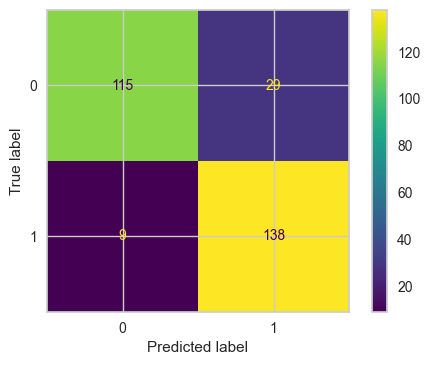

In [292]:
m2='Logistic Regression'
lr=LogisticRegression()
model=lr.fit(X_train, y_train)
lr_predict=lr.predict(X_test)
lr_conf_matrix=confusion_matrix(y_test, lr_predict)
lr_acc_score=accuracy_score(y_test, lr_predict)
print('confusion matrix')
print(lr_conf_matrix)
print('\n')
print('Accuracy of Logistic Regression',lr_acc_score,'\n')
print(classification_report(y_test,lr_predict))

plot_confusion_matrix(lr, X_test, y_test)

plt.show()

RANDOM FOREST

confusion matrix
[[125  19]
 [  3 144]]


Accuracy of Random Forest: 0.9243986254295533 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       144
           1       0.88      0.98      0.93       147

    accuracy                           0.92       291
   macro avg       0.93      0.92      0.92       291
weighted avg       0.93      0.92      0.92       291



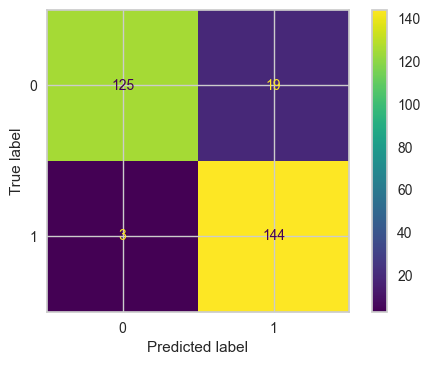

In [293]:
m3='Random Forest Classifier'
rf=RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted=rf.predict(X_test)
rf_conf_matrix=confusion_matrix(y_test, rf_predicted)
rf_acc_score=accuracy_score(y_test, rf_predicted)
print('confusion matrix')
print(rf_conf_matrix)
print('\n')
print('Accuracy of Random Forest:', rf_acc_score,'\n')
print(classification_report(y_test,rf_predicted))

plot_confusion_matrix(rf, X_test, y_test)

plt.show()

XGBOOST

In [294]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [295]:
m4= 'Extreme Gradient Boost'
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv=10)
score.mean()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 98.28%
confusion matrix
[[139   5]
 [  0 147]]


Accuracy of Extreme Boost: 0.9828178694158075 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       144
           1       0.97      1.00      0.98       147

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



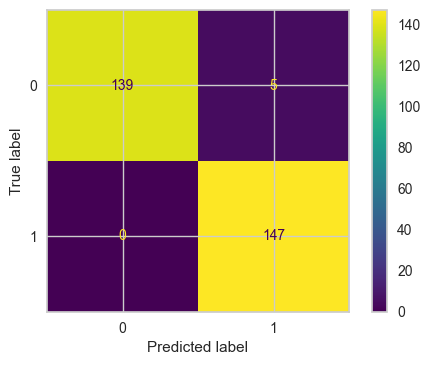

In [296]:
xgb.fit(X_train,y_train)
xgb_predicted = xgb.predict(X_test)
accuracy = accuracy_score(y_test, xgb_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
xgb_conf_matrix=confusion_matrix(y_test, xgb_predicted)
xgb_acc_score=accuracy_score(y_test, xgb_predicted)
print('confusion matrix')
print(xgb_conf_matrix)
print('\n')
print('Accuracy of Extreme Boost:', xgb_acc_score, '\n')
print(classification_report(y_test,xgb_predicted))

plot_confusion_matrix(xgb, X_test, y_test)

plt.show()

In [297]:
accuracy

0.9828178694158075

FEATURE IMPORTANCE

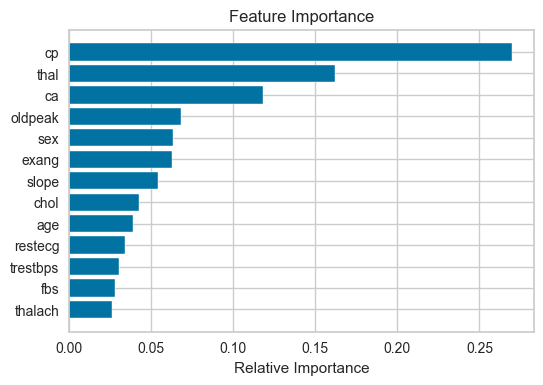

In [298]:
xgb = XGBClassifier(max_depth=6)
xgb.fit(X,y)
train_features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
# indices
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ROC CURVES

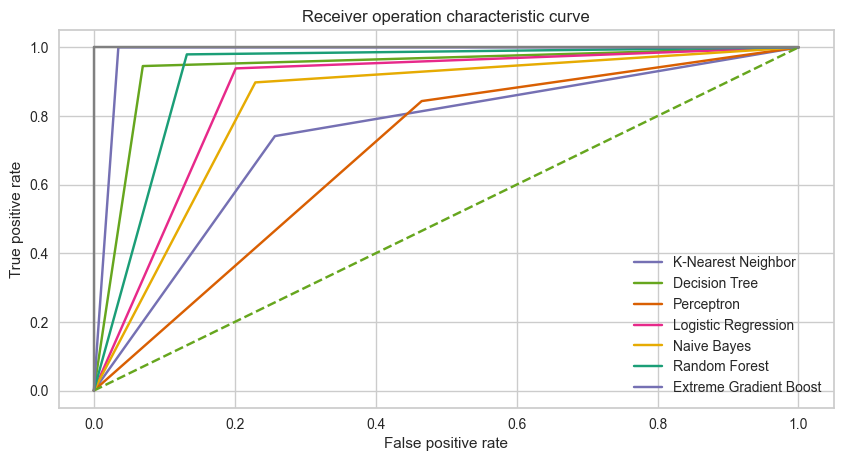

In [299]:
knn_false_positive_rate,knn_true_positive_rate,knn_threshold= roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold= roc_curve(y_test,dtpred)
lr_false_positive_rate,lr_true_positive_rate,lr_threshold= roc_curve(y_test,lr_predict)
perceptron_false_positive_rate,perceptron_true_positive_rate,perceptron_threshold= roc_curve(y_test,perceptron_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold= roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold= roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold= roc_curve(y_test,xgb_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver operation characteristic curve')
plt.plot(knn_false_positive_rate,knn_true_positive_rate, label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate, label='Decision Tree')
plt.plot(perceptron_false_positive_rate,perceptron_true_positive_rate, label='Perceptron')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate, label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate, label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate, label='Extreme Gradient Boost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [300]:
model_ev= pd.DataFrame({'Model':['Logistic Regression','Decision tree','K-Nearest Neighbor','Perceptron','Naive Bayes','Random Forest','Extreme Gradient Boost'], 'Accuracy': [lr_acc_score,dt_acc_score,knn_acc_score,perceptron_acc_score,nb_acc_score,rf_acc_score,xgb_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.869416
1,Decision tree,0.938144
2,K-Nearest Neighbor,0.742268
3,Perceptron,0.690722
4,Naive Bayes,0.835052
5,Random Forest,0.924399
6,Extreme Gradient Boost,0.982818


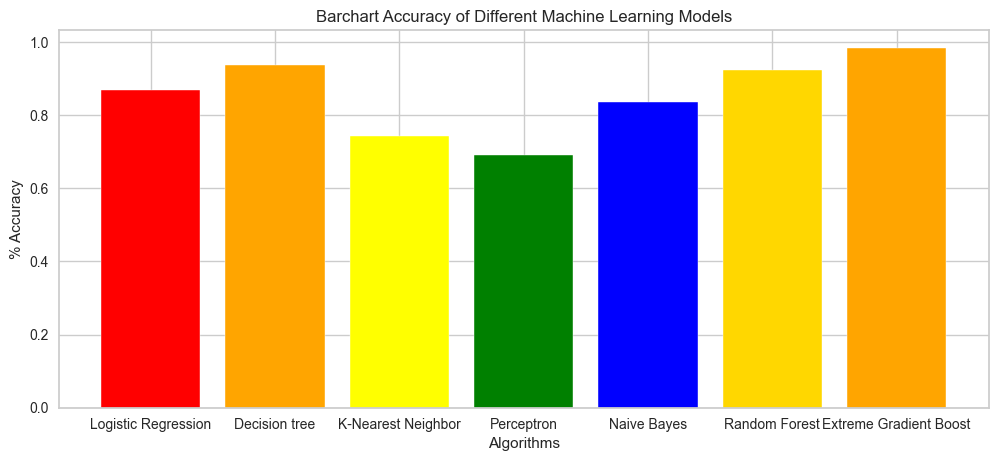

In [301]:
colors=['red','orange','yellow','green','blue','gold','orange',]
plt.figure(figsize=(12,5))
plt.title('Barchart Accuracy of Different Machine Learning Models')
plt.xlabel('Algorithms')
plt.ylabel('% Accuracy')
plt.bar(model_ev['Model'],model_ev['Accuracy'],color=colors)
plt.show()

ENSEMBLE WITH LR, XGB AND RF > 98%

Confusion matrix
[[141   3]
 [  0 147]]


Accuracy of StackingCVClassifier: 0.9896907216494846 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       147

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



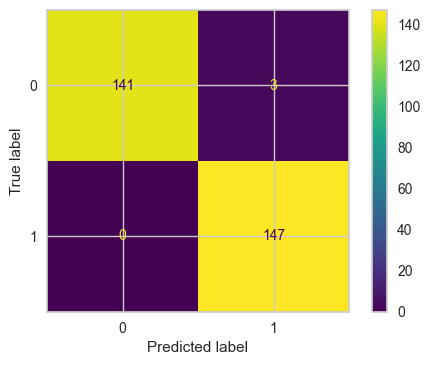

In [302]:
scv=StackingCVClassifier(classifiers=[xgb,rf],meta_classifier=xgb,random_state=42)
scv.fit(X_train,y_train)
scv_predicted=scv.predict(X_test)
scv_conf_matrix=confusion_matrix(y_test, scv_predicted)
scv_acc_score= accuracy_score(y_test, scv_predicted)
print('Confusion matrix')
print(scv_conf_matrix)
print('\n')
print('Accuracy of StackingCVClassifier:',scv_acc_score,'\n')
print(classification_report(y_test,scv_predicted))
plot_confusion_matrix(scv, X_test, y_test)

plt.show()

In [303]:
model_ev= pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Perceptron','K-Nearest Neighbor','Naive Bayes','Random Forest','Extreme Gradient Boost','StackingCV Classifier'], 'Accuracy': [lr_acc_score,dt_acc_score,knn_acc_score,perceptron_acc_score,nb_acc_score,rf_acc_score,xgb_acc_score,scv_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.869416
1,Decision Tree,0.938144
2,Perceptron,0.742268
3,K-Nearest Neighbor,0.690722
4,Naive Bayes,0.835052
5,Random Forest,0.924399
6,Extreme Gradient Boost,0.982818
7,StackingCV Classifier,0.989691


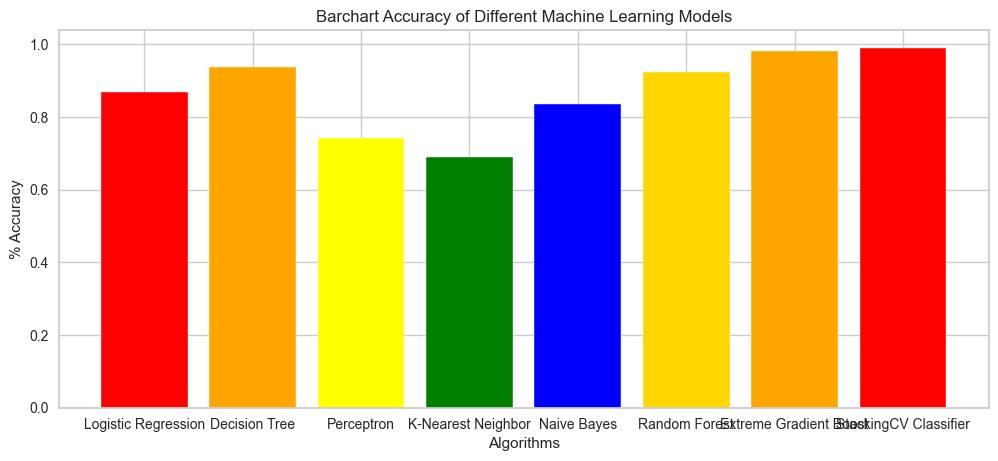

In [304]:
colors=['red','orange','yellow','green','blue','gold','orange',]
plt.figure(figsize=(12,5))
plt.title('Barchart Accuracy of Different Machine Learning Models')
plt.xlabel('Algorithms')
plt.ylabel('% Accuracy')
plt.bar(model_ev['Model'],model_ev['Accuracy'],color=colors)
plt.show()

 Best evaluation parameters achieved with XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       147

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



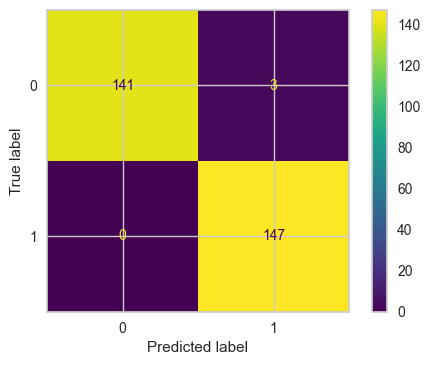

In [305]:
print(" Best evaluation parameters achieved with XGBoost:")
print(classification_report(y_test,scv_predicted))

plot_confusion_matrix(scv, X_test, y_test)

plt.show()


 The total of training dataset (677, 13)

 The total of test dataset (291, 13)

------------------------------

 Random Forest: : 0.990

 Decision Tree: : 0.990

 Extreme Gradient Boost: : 0.990

 Voting Classifier 0.990
[[141   3]
 [  0 147]]


Accuracy of StackingCVClassifier: 0.9896907216494846 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       147

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



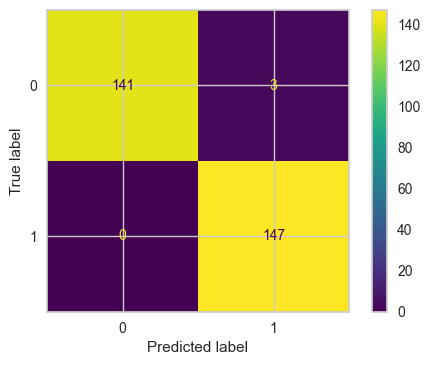

In [306]:
#check the dimension of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)
print('\n------------------------------')

#Instantiate the models
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
xgb=XGBClassifier()
classifier_list=[('Random Forest:',rf),('Decision Tree:',dt),('Extreme Gradient Boost:',xgb)]



#declare a create loop to iterate through the models
for clsf_name, clsf in classifier_list:
     clsf.fit(X_train, y_train)#fit each model


     y_pred=clsf.predict(X_test) #predict the label on test set for each models
     print('\n {:s} : {:.3f}'.format(clsf_name, accuracy_score(y_test,y_pred))) #print evaluation score


vc=VotingClassifier(estimators=classifier_list) #instantiating the voting classifier
vc.fit(X_train,y_train) #fit vc to the training set and labels

y_pred_vc=clsf.predict(X_test) #predict test label vc

print('\n Voting Classifier {:.3f}'.format(accuracy_score(y_test,y_pred_vc)))


vc_acc_score= accuracy_score(y_test, y_pred_vc)
print(scv_conf_matrix)
print('\n')
print('Accuracy of StackingCVClassifier:',vc_acc_score,'\n')
print(classification_report(y_test,y_pred_vc))


plot_confusion_matrix(clsf, X_test, y_test)

plt.show()


CHECKING THE FITTING STATUS OF ENSEMBLE MODEL

In [307]:
#instantiate cross validation
kfold_split=KFold(n_splits=10)

for clsf_name, clsf in classifier_list:
     clsf.fit(X_train, y_train)#fit each model

 #compute the array containig the 10-folds CV MSEs
     CV_scores_clsf=-cross_val_score(clsf,X_train, y_train, cv=kfold_split)
     print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores_clsf.mean()*-1, CV_scores_clsf.std()),end='\n\n')

     #predict and calculate the accuracy on test data for each model
     y_pred_test_clsf= clsf.predict(X_test)
     print('\n{:s} Test : {:.3f}'.format(clsf_name, accuracy_score(y_test, y_pred_test_clsf)), '\n')

 #predict and calculate the accuracy on train data for each model
     y_pred_train_clsf= clsf.predict(X_train)
     print('\n{:s} Train : {:.3f}'.format(clsf_name, accuracy_score(y_train, y_pred_train_clsf)), '\n')
     print('-------------------------------------------')

     #instantiate the voting classifier
     vc=VotingClassifier(estimators= classifier_list)

     #fit vc to the training set and labels
     vc.fit(X_train, y_train)

     #compute the array containing the 10 folds CV MSEs
     CV_scores_vc=-cross_val_score(vc,X_train, y_train, cv=10)
     print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores_vc.mean()*-1,CV_scores_vc.std()),end='\n\n')

     #lets predict the label for training set
     y_pred_train_vc=vc.predict(X_train)
     print('\nVoting Classifier Train {:.3f}'.format(accuracy_score(y_train, y_pred_train_vc)), '\n')



Cross Val mean: 0.993 (std: 0.010)


Random Forest: Test : 0.990 


Random Forest: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.988 (std: 0.011)


Voting Classifier Train 1.000 


Cross Val mean: 0.987 (std: 0.017)


Decision Tree: Test : 0.990 


Decision Tree: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.988 (std: 0.011)


Voting Classifier Train 1.000 


Cross Val mean: 0.990 (std: 0.009)


Extreme Gradient Boost: Test : 0.990 


Extreme Gradient Boost: Train : 1.000 

-------------------------------------------

Cross Val mean: 0.988 (std: 0.011)


Voting Classifier Train 1.000 



SAVING MODEL WITH JOBLIB FILE OR PICKLE FILE

In [308]:
#import joblib
#final_model='final_model.sav'
#joblib.dump(vc, final_model)

In [309]:
#loading saved file
#loaded_model=joblib.load(open('final_model.sav'))

In [310]:
import pickle
pickle.dump(vc, open('model.pkl', 'wb'))

In [311]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)